In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# KPZ

In [25]:
class KPZ:
    def __init__(self,n, T=1):
        self.n = n +1
        self.matrix = np.random.normal(size=(self.n,self.n))
        self.Z_matrix = np.zeros((self.n,self.n))
        self.T = T
    
    def Z(self,x,y):
        """
        Return the partition function for a polymer at point (x,y) at a heat bath T.
        """
        if x == 0 and y == 0:
            self.Z_matrix[x,y] = np.exp(-self.matrix[x,y])
        elif x == 0:
            self.Z_matrix[x,y] = (self.Z_matrix[x,y-1])*np.exp(-self.matrix[x,y]) 
        elif y == 0:
            self.Z_matrix[x,y] = (self.Z_matrix[x-1,y])*np.exp(-self.matrix[x,y])
        else:
            self.Z_matrix[x,y] = (self.Z_matrix[x-1,y] + self.Z_matrix[x,y-1])*np.exp(-self.matrix[x,y])
    
    def run(self):
        for i in range(self.n):
            for j in range(self.n):
                self.Z(i,j)
        return self.Z_matrix[self.n-1,self.n-1]/np.mean(self.Z_matrix)

### Simulation

In [78]:
def simulation(N_min,N_max,samples = 10,temperature = 100):
    N_ = np.arange(N_min,N_max)
    H_ = np.zeros(len(N_))
    Time_ = np.zeros(len(N_))
    
    for i,nn in enumerate(N_):
        mea = []
        for _ in range(samples):
            Sol = KPZ(nn, T = temperature)
            mea.append(Sol.run())        
        H_[i] = np.log(np.mean(mea))
        Time_[i] = 2*nn/float(temperature**4.)
    return H_,Time_

Solving for N= 200
Solving for N= 201
Solving for N= 202
Solving for N= 203
Solving for N= 204
Solving for N= 205
Solving for N= 206
Solving for N= 207
Solving for N= 208
Solving for N= 209
Solving for N= 210
Solving for N= 211
Solving for N= 212
Solving for N= 213
Solving for N= 214
Solving for N= 215
Solving for N= 216
Solving for N= 217
Solving for N= 218
Solving for N= 219
Solving for N= 220
Solving for N= 221
Solving for N= 222
Solving for N= 223
Solving for N= 224
Solving for N= 225
Solving for N= 226
Solving for N= 227
Solving for N= 228
Solving for N= 229
Solving for N= 230
Solving for N= 231
Solving for N= 232
Solving for N= 233
Solving for N= 234
Solving for N= 235
Solving for N= 236
Solving for N= 237
Solving for N= 238
Solving for N= 239
Solving for N= 240
Solving for N= 241
Solving for N= 242
Solving for N= 243
Solving for N= 244
Solving for N= 245
Solving for N= 246
Solving for N= 247
Solving for N= 248
Solving for N= 249
Solving for N= 250
Solving for N= 251
Solving for 

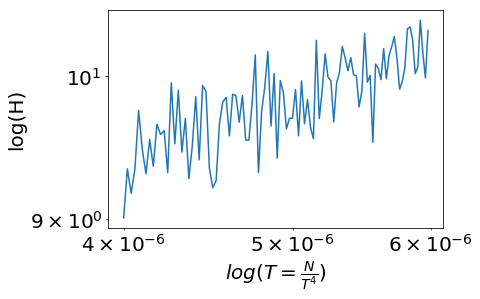

In [77]:
H,Time = simulation(200,300)
plt.plot(Time,H)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$log(T = \frac{N}{T^4})$')
plt.ylabel('log(H)')
plt.show()